<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 8</font></h1>   

<h1 align=center><font size = 5>TEAM JOHNSON-SIRLEAF </font></h1>  
<h2 align=center><font size = 6>MACHINE LEARNING APPROACH TO
PREDICTING DIABETES RISKS</font></h2>

<h5 align=center><font size = 2>Data Source: <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset" target="_blank">Kaggle.<a/></font></h5>

## DATA PREPARATION

In [1]:
# import libraries

import numpy as np                      # for mahematical operations
import pandas as pd                     # for data manipulation and cleaning
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization
import matplotlib.pyplot as plt         # for data visulization

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Data Loading

In [2]:
# Read in dataset
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [3]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [4]:
# Proof of Imbalanced Dataset
Data_diabetic = df[df["diabetes"] == 1]
Data_not_diabetic = df[df["diabetes"] == 0]
print(f"The number of data points for non diabetic patients is {Data_not_diabetic.shape}")
print(f"The number of data points for diabetic patients is {Data_diabetic.shape}")

The number of data points for non diabetic patients is (91500, 9)
The number of data points for diabetic patients is (8500, 9)


### Data Dictionary

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Gender               | character | Biological sex of the individual  |
| Age                  | numeric   | Age of the individual  |
| Hypertension         | numeric   | 0 = No Hypertension / 1 = Has Hypertension|
| Heart_disease        | numeric   | 0 = No Heart disease / 1 = Has Heart disease|
| Smoking_history      | character | 5 categories i.e not current,former,No Info,current,never and ever |
| bmi                  | numeric   | Body Mass Index, a measure of body fat based on weight and height|
| HbA1c_level          | numeric   | Hemoglobin A1c, a measure of a person's average blood sugar level over the past 2-3 months|
| Blood_glucose_level  | numeric | Amount of glucose in the bloodstream at a given time|
| Diabetes             | numeric | 0 indicates absence of diabetes, 1 indicates presence of Diabetes|

In [5]:
# check the data types of each features
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
# check the shape of the data
df.shape

(100000, 9)

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
# Checking statistics of the numeric features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Data Wrangling

In [10]:
# save a copy of the data
df_copy = df.copy('Dataset/diabetes_prediction_dataset.csv')

In [11]:
def df_wrangle(df, dtype_convert, OneHot_cols):
    '''
    This function wrangles (cleans) our dataset by correcting datypes and One-Hot
    encoding dpecified columns
    
    Inputs
    df: (dataframe), dataframe to wrangle
    dtype_convert: (dictionary), pairs of column, dtype to convert to
    OneHot_col: (list), columns in the dataframe to One-Hot encode
    
    Output
    df: (dataframe), wrangled (cleaned) dataframe
    '''
    
    # convert datatypes to correct formats
    for col, dtype in dtype_convert.items():
        df[col] = df[col].astype(dtype)
        
    # One_Hot encode neccesary columns
    
    # Initialize the One-Hot Encoder
    encoder = OneHotEncoder()
    
    # One-Hot encode each column
    for col in OneHot_cols:
        # variable to store new column names
        df_col_name = []
        
        # unique values in current column
        vals = df[col].unique()             

        for val in vals:
            # replace spaces in values with underscore
            val = val.replace(' ', '_')
            
            # combine initial column name and current value as new column name
            df_col_name.append(col+'_'+val) 
                                            
        # encode the columns
        encoded_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        
        # rename the new columns
        encoded_df.columns = df_col_name
        
        # add new columns to dataframe
        df = df.join(encoded_df)

    # drop the initial columns
    df.drop(OneHot_cols, axis=1, inplace=True)
    
    # drop duplicate records
    df.drop_duplicates(inplace=True)
    
    return df

In [12]:
df = df_wrangle(df, {'age':'int'}, ['gender', 'smoking_history'])

In [13]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_never,smoking_history_No_Info,smoking_history_current,smoking_history_former,smoking_history_ever,smoking_history_not_current
0,80,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96112 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96112 non-null  int32  
 1   hypertension                 96112 non-null  int64  
 2   heart_disease                96112 non-null  int64  
 3   bmi                          96112 non-null  float64
 4   HbA1c_level                  96112 non-null  float64
 5   blood_glucose_level          96112 non-null  int64  
 6   diabetes                     96112 non-null  int64  
 7   gender_Female                96112 non-null  float64
 8   gender_Male                  96112 non-null  float64
 9   gender_Other                 96112 non-null  float64
 10  smoking_history_never        96112 non-null  float64
 11  smoking_history_No_Info      96112 non-null  float64
 12  smoking_history_current      96112 non-null  float64
 13  smoking_history_forme

In [15]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_never,smoking_history_No_Info,smoking_history_current,smoking_history_former,smoking_history_ever,smoking_history_not_current
count,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000
mean,41.798287,0.077628,0.040817,27.321923,5.532618,138.221013,0.088251,0.584131,0.415682,0.000187,0.341820,0.095690,0.041597,0.096752,0.357895,0.066246
std,22.472901,0.267587,0.197867,6.768534,1.073288,40.911287,0.283661,0.492874,0.492842,0.013684,0.474322,0.294168,0.199668,0.295621,0.479384,0.248712
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Defining Model Variables and Target

In [16]:
X = df.drop('diabetes', axis=1)
X.shape

(96112, 15)

In [17]:
y = df['diabetes']
y.shape

(96112,)

### Cross Validation

We have a total of 96,112 datasets, we would carry out cross validation to make sure we immerse the 80% of our dataset into model training and 20% into test. For this we would use a kfold of 5.

In [18]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [19]:
print(f'Shape of X_train_val {X_train_val.shape}    Shape of y_train_val {y_train_val.shape}')
print(f'Shape of X_test      {X_test.shape}    Shape of y_test      {y_test.shape}')

Shape of X_train_val (76889, 15)    Shape of y_train_val (76889,)
Shape of X_test      (19223, 15)    Shape of y_test      (19223,)


#### Cross Validation using F1 score as evaluation metrics

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score

In [21]:
model = LogisticRegression(max_iter=1000)

In [22]:
scaler = StandardScaler().fit(X_train_val)
X_train_val_scaled = scaler.transform(X_train_val)

In [23]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average="binary")

In [24]:
cross_val_result_arr = cross_val_score(model, X_train_val_scaled, y_train_val, cv=kf, scoring=f1_scorer)

In [25]:
# Printing the results
print("Cross-Validation Results:", cross_val_result_arr)
print(f"Mean F1 score: {cross_val_result_arr.mean():.4f}")
print(f"Standard deviation of F1 score: {cross_val_result_arr.std():.4f}")

Cross-Validation Results: [0.74675596 0.73065539 0.72245944 0.73164557 0.73254836]
Mean F1 score: 0.7328
Standard deviation of F1 score: 0.0078


In [26]:
## Evaluating on test dataset
model = LogisticRegression()

model.fit(X_train_val_scaled, y_train_val)

y_pred = model.predict(scaler.transform(X_test))

f1_test_score = f1_score(y_test, y_pred, average='binary')

print(f"F1 Score on Test Set: {f1_test_score:.4f}")

F1 Score on Test Set: 0.7204


### Confusion Matrix

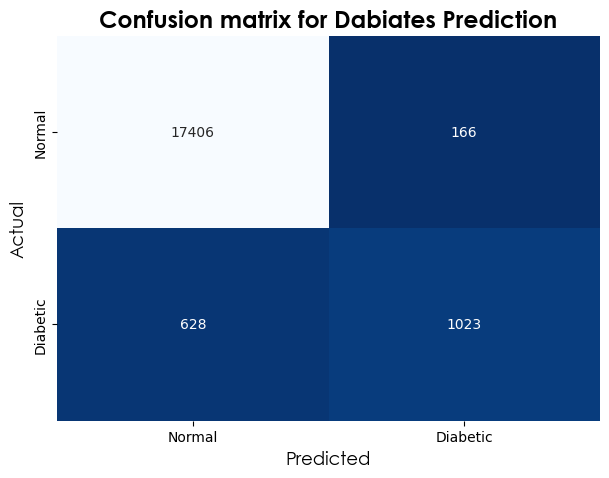

In [27]:
color  = ['#3355FF','#00FF00','#0D004D','#00bfff','#ffcc99','#006600']
# sns.countplot(x='Purchased', data = insurance, palette = color[2:4]);


def ConfusionMatrix(ytest, ypred, label: [str, str] = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'Blues_r')
    plt.xlabel('Predicted',font = 'Century Gothic', fontsize = 13)
    plt.ylabel('Actual', font = 'Century Gothic', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.title('Confusion matrix for Dabiates Prediction', font = "Century Gothic", fontsize = 17,fontweight = 'bold');


ConfusionMatrix(y_test, y_pred, label = ["Normal", "Diabetic"])

### Interpretation of the Logistic Regression Model Evaluation Performance
Out of the `19,223` patient data used for the test dataset:

There are `17406` True Negatives (TN): predicting that patients are  not diabetic and truly the patients are not diabetic.

There `628` False Negatives (FN): predicting that the patients are not diabetic meanwhile the patients are diabetic.

There are `1023` True Positives (TP): predicting that the patients are diabetic and they actually diabetic.

There are also `166` False Positives (FP): predicting that the patients are diabetic meanwhile they are actually not diabetic.

Based on the confusion matrix, we can see that although performed very well in predicting the positive and negative cases, it can still be better.

### Polynomial Engineering for Model Complexity.

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures

In [29]:
def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree, include_bias=False),
                         LogisticRegression(**kwargs))

In [30]:
scaler = StandardScaler().fit(X_train_val)
X_train_val_scaled = scaler.transform(X_train_val)

In [31]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average="binary")

In [32]:
degree = np.arange(1,4)

In [33]:
train_score, val_score = validation_curve(PolynomialRegression(degree, max_iter=100000),
                                          X_train_val_scaled, y_train_val,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=kf, scoring=f1_scorer)

In [44]:
# Printing the results
print("Train scores:\n", train_score)
print()
print("Validation scores:\n", val_score)
print()
print(f"Mean F1 score: {val_score.mean(axis=1)}")
print()
print(f"Standard deviation of F1 score: {val_score.std(axis=1)}")

Train scores:
 [[0.7305579  0.73431073 0.73589689 0.73259377 0.73396624]
 [0.74696744 0.75058374 0.75390335 0.75074563 0.74941601]
 [0.80360592 0.80871516 0.81003737 0.80532589 0.80655176]]

Validation scores:
 [[0.74675596 0.73065539 0.72245944 0.73164557 0.73254836]
 [0.7665827  0.74392842 0.73296185 0.74531516 0.74756046]
 [0.81297388 0.79190004 0.7887689  0.80171306 0.79415557]]

Mean F1 score: [0.73281294 0.74726972 0.79790229]

Standard deviation of F1 score: [0.00784463 0.0108883  0.00866209]


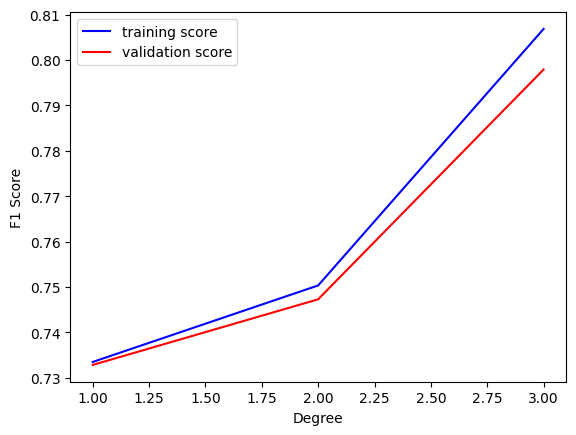

In [46]:
plt.plot(degree,np.mean(train_score,axis=1),'b',label='training score')
plt.plot(degree,np.mean(val_score,axis=1),'r',label='validation score')
plt.xlabel('Degree')
plt.ylabel('F1 Score')
plt.legend();

The plot above shows that our model can still improve up to around 97% using 3rd order polynomial feature genration.

They is posibility to achieve more than this. The model was built only up to the 3rd degree polynomial because of the long time needed for higher orders